<a href="https://colab.research.google.com/github/jun-0123/2024_2_DL/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_GRU_%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

# 단어 수를 10000개로 제한하여 데이터 로드
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

# 훈련 데이터를 훈련 세트와 검증 세트로 분리
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)


from tensorflow.keras.preprocessing.sequence import pad_sequences

# 데이터를 패딩하여 길이를 100으로 맞춤
train_seq = pad_sequences(train_input, maxlen=100)
test_seq = pad_sequences(test_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [ ]:
from tensorflow import keras

# GRU 모델 구축
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
# 모델 컴파일
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

# 콜백 설정
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

# 모델 훈련
history4 = model4.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.5286 - loss: 0.6926 - val_accuracy: 0.5342 - val_loss: 0.6923
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - accuracy: 0.5468 - loss: 0.6917 - val_accuracy: 0.5562 - val_loss: 0.6909
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.5755 - loss: 0.6899 - val_accuracy: 0.5674 - val_loss: 0.6889
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - accuracy: 0.5889 - loss: 0.6875 - val_accuracy: 0.5872 - val_loss: 0.6856
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.6106 - loss: 0.6830 - val_accuracy: 0.5980 - val_loss: 0.6805
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 56ms/step - accuracy: 0.6189 - loss: 0.6772 - val_accuracy: 0.6070 - val_loss: 0.6726
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step - accuracy: 0.6243 - loss: 0.6686 - val_accuracy: 0.6258 - val_loss: 0.6611
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.6395 - loss: 0

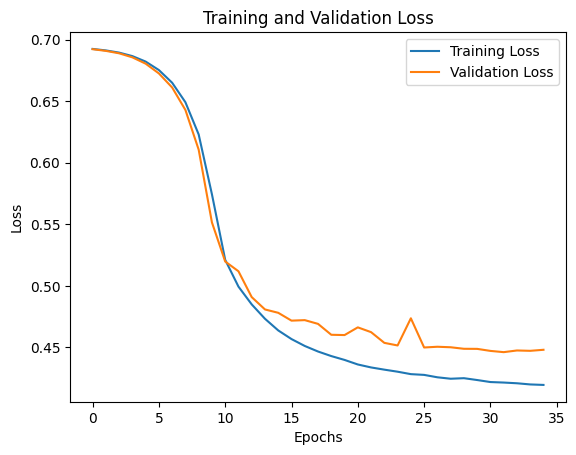

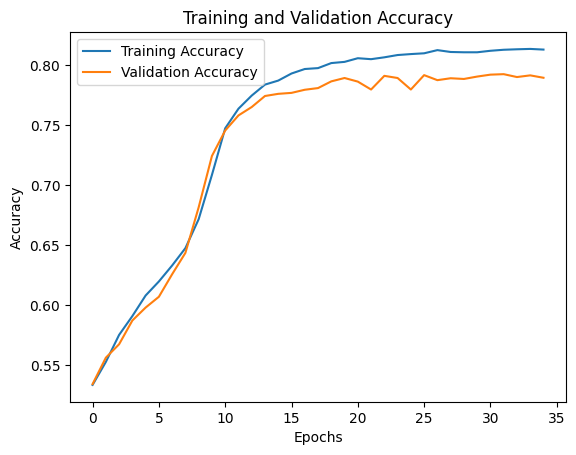

In [ ]:
import matplotlib.pyplot as plt

# 손실 그래프
plt.plot(history4.history['loss'], label='Training Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 정확도 그래프
plt.plot(history4.history['accuracy'], label='Training Accuracy')
plt.plot(history4.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# 저장된 모델 로드
best_model = keras.models.load_model('best-gru-model.keras')

# 로드한 모델로 테스트 데이터 평가
best_test_loss, best_test_acc = best_model.evaluate(test_seq, test_target)
print(f'Best Model Test Loss: {best_test_loss}')
print(f'Best Model Test Accuracy: {best_test_acc}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.7963 - loss: 0.4407
Best Model Test Loss: 0.441251277923584
Best Model Test Accuracy: 0.7946000099182129


In [ ]:
# 샘플 리뷰 5개 출력
def decode_review(review):
    word_index = imdb.get_word_index()
    # 인덱스를 단어로 변환
    reverse_word_index = {value: key for key, value in word_index.items()}
    decoded = ' '.join([reverse_word_index.get(i - 3, '?') for i in review])  # 3을 빼는 이유: 패딩 및 특별 토큰 처리
    return decoded

# 5개의 샘플 리뷰 출력
for i in range(5):
    review = decode_review(train_input[i])  # 훈련 세트에서 리뷰 디코딩
    print(f'Review {i+1}: {review}')
    print(f'Label: {train_target[i]}')  # 레이블도 함께 출력


Review 1: ? well how do you even ? a movie such as this one does it even have ? ? really it's a movie that tries to get as close to being a ? movie as ? ? the entire movie is ? a ? of guys ? a young girl not very ? and on top of that also not that ? really br br it's ? that the movie ? to be as ? and ? as ? however the movie is just all too ? for that to work out as ? the ? and ? is all ? and ? looking as well as ? they are often just ? into the ? rather than into the girl ? also the way the girl ? to all the ? is pretty ? i mean if this was real ? she would had ? it out there is more ? than ? in this one though br br the movie is ? low budget and it's a ? ? at trying to ? something ? and ? as well as original and ? with very ? ? don't really think this movie made much ? though at the time it got ? though it must had done something well since a ? of ? ? got ? after this one br br fans of ? and ? will most ? be ? by this movie though there are still some ? people out there who will get 